# Using the QUBO Linear Solver
This notebook illustrates how to us the QUBO linear solvers included in `QuantumNewonRaphson` via our `qubols` library. 
We first need to sdefine the linear system:

$$A \cdot x = b$$

We use here a randon sparse matrix $A$ and a random right hand side vector $b$

In [1]:
from scipy.sparse import random as sprand
import numpy as np

A = 0.5 * sprand(5, 5, density=0.75, format="csr")
b = 0.1 * np.random.rand(5)

## Classical Solution
We can of course obtain the solution of this linear system using `numpy` 

In [2]:
ref = np.linalg.solve(A.todense(), b)

# QUBO Solution
The QUBO formalism solve optimization problem using binary variables. TO use QUBO for linear system we must therefore define an scheme to encode the floating point numbers of our solution vector $x$ on a series of binary variables. Several encoding schemes are available in `qubols` and more details can be found in the documenation of `qubols`. 

We also need to specify how many variables are use in this scheme to encode each variable. We use here 21 binary variables by setting `'num_qubits=21'`. Finally we use 100 optimization of the problem to attempt reaching the global solution of the problem.

We can now instantiate the `QUBO_SOLVER`, and use the `.run()` method to solve the linear problem

In [3]:
from quantum_newton_raphson.qubo_solver import QUBO_SOLVER

solver = QUBO_SOLVER(num_reads=100, num_qbits=21, normalize=False)
res = solver(A, b)

## Visualize the solution

We can use matplotlib to visualize the solution

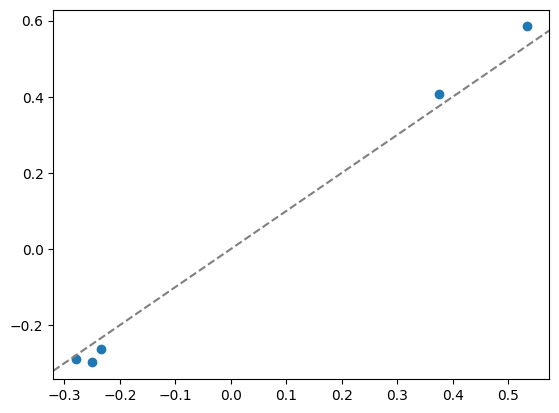

In [4]:
import matplotlib.pyplot as plt

_ = plt.axline((0, 0), slope=1, linestyle="--", color="grey")
plt.scatter(res.solution, ref)